# Assignment 1: Forecast Eurovision Voting

 - Date: 18th May 2017
 - Code Version : 1.0
 - Python Version: 3

## Problem Details

The intrigue of Eurovision - the modeller's delight

Since its inauguration in 1956, the Eurovision Song Contest has transfixed millions of viewers worldwide with its bubblegum pop, quirks, ballads and flops.  During its tenure as one of the world's longest-running television programs, it has attracted its fair share of controversy, with claims that the voting outcomes don't simply reflect performance quality but are influenced by factors such as regional politics, expatriate populations, alliances, and artists' sexual appeal.  Patterns have appeared over time which support this hypothesis. 

Here we will attempt to exploit these patterns in order to predict the voting for the 2010 Eurovision Song Contest.


** kaggle competition link **

https://www.kaggle.com/c/Eurovision2010


## Solutions:

 - We tried modeling this problem both has linear regression and classification problem
 - Linear regression preformed better
 - We observed adding more layer to network or widening didn't result in better accuracy
 
 
 ** WE ACHEVIED ABSOLUTE ERROR OF 2512.0**
 
 Which put us, 6 on leaders board :)
 
 


## Data

 - train.csv : training data
 - test.csv : test data without labels
 - test_withlabels.csv : test data with labels to evaluate 

### Data exploration

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [18]:
# load data
train_data = pd.read_csv('data/train.csv',encoding = "ISO-8859-1")
test_data = pd.read_csv('data/test.csv',encoding = "ISO-8859-1")
eval_data = pd.read_csv('data/test_withlabels.csv',encoding = "ISO-8859-1")

In [19]:
#visualize data
print("Train data shape:" + str(train_data.shape))
print("Test data shape:" + str(test_data.shape))

train_data.head()

Train data shape:(266, 63)
Test data shape:(25, 63)


,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,...,Serbia,Serbia & Montenegro,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,2008,Romania,Former Socialist Bloc,"Romanian, Italian",Nico and Vlad,"""Pe-o margine de lume""",On an edge of the world,Both,Group,20,...,0.0,NaN,NaN,0.0,12.0,0.0,0.0,0.0,0.0,0.0
1,2008,United Kingdom,Independent,English,Andy Abraham,"""Even If""",?,Male,Solo,25,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2008,Albania,Former Socialist Bloc,Albanian,Olta Boka,"""Zemrn e lam peng""",Hearts trapped in time,Female,Solo,17,...,0.0,NaN,NaN,4.0,0.0,0.0,8.0,1.0,0.0,0.0
3,2008,Germany,Western Europe,English,No Angels,"""Disappear""",?,Female,Group,23,...,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,2008,Armenia,Former Socialist Bloc,"English, Armenian",Sirusho,"""Ql, Ql""","Come on, come on",Female,Solo,4,...,5.0,NaN,NaN,5.0,10.0,2.0,0.0,10.0,7.0,0.0


### Data preprocessing

**Features columns in data:**

'Year', 'Country   ', 'Region', 'Song language', 'Artist   ', 'Song   ',
       'English translation ', 'Artist gender', 'Group/Solo', 'Place',
       'Points', 'Host Country', 'Host region', 'Home/Away Country',
       'Home/Away Region', 'Approximate Betting Prices'
       
**Label columns in data:**

'Albania ', 'Andorra ', 'Armenia ', 'Austria', 'Azerbaijan ',
       'Belarus ', 'Belgium ', 'Bosnia and Herzegovina ', 'Bulgaria ',
       'Croatia ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Estonia ',
       'Finland ', 'France ', 'Georgia', 'Germany ', 'Greece ', 'Hungary ',
       'Iceland ', 'Ireland ', 'Israel ', 'Latvia ', 'Lithuania ',
       'Macedonia ', 'Malta ', 'Moldova ', 'Monaco', 'Montenegro ',
       'Netherlands ', 'Norway ', 'Poland ', 'Portugal ', 'Romania ',
       'Russia ', 'San Marino', 'Serbia ', 'Serbia & Montenegro', 'Slovakia ',
       'Slovenia ', 'Spain ', 'Sweden ', 'Switzerland ', 'Turkey ', 'Ukraine ',
       'United Kingdom '

In [20]:
# fill all NaN with -1
train_data = train_data.fillna('-1')
test_data = test_data.fillna('-1')
eval_data = eval_data.fillna('-1')

To make data trainable.. melting label columns into create two new columns

 - "Scoring Country" : Which country is scoring
 - "Score" : Corresponding countries code

In [21]:
#melt scoring country in data 

feature_columns = ['Year', 'Country   ', 'Region', 'Song language', 'Artist   ', 'Song   ',
       'English translation ', 'Artist gender', 'Group/Solo', 'Place',
       'Points', 'Host Country', 'Host region', 'Home/Away Country',
       'Home/Away Region', 'Approximate Betting Prices']

label_columns = ['Albania ', 'Andorra ', 'Armenia ', 'Austria', 'Azerbaijan ',
       'Belarus ', 'Belgium ', 'Bosnia and Herzegovina ', 'Bulgaria ',
       'Croatia ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Estonia ',
       'Finland ', 'France ', 'Georgia', 'Germany ', 'Greece ', 'Hungary ',
       'Iceland ', 'Ireland ', 'Israel ', 'Latvia ', 'Lithuania ',
       'Macedonia ', 'Malta ', 'Moldova ', 'Monaco', 'Montenegro ',
       'Netherlands ', 'Norway ', 'Poland ', 'Portugal ', 'Romania ',
       'Russia ', 'San Marino', 'Serbia ', 'Serbia & Montenegro', 'Slovakia ',
       'Slovenia ', 'Spain ', 'Sweden ', 'Switzerland ', 'Turkey ', 'Ukraine ',
       'United Kingdom ']

train_data = pd.melt(train_data, id_vars=feature_columns, value_vars= label_columns,var_name='Scoring Country',value_name='Score')
test_data = pd.melt(test_data, id_vars=feature_columns, value_vars= label_columns,var_name='Scoring Country',value_name='Score')
eval_data = pd.melt(eval_data, id_vars=feature_columns, value_vars= label_columns,var_name='Scoring Country',value_name='Score')

** Handling when Score is empty **

Scores are empty when,

- A country didn't participate
- Same country is performing

Hence where scorings are not availible, row are dropped

In [22]:
train_data = train_data.drop(train_data[train_data['Score'] == '-1'].index)

In [23]:
eval_data = eval_data.drop(eval_data[eval_data['Score'] == '-1'].index)

In [24]:
train_data.head()

,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,Points,Host Country,Host region,Home/Away Country,Home/Away Region,Approximate Betting Prices,Scoring Country,Score
0,2008,Romania,Former Socialist Bloc,"Romanian, Italian",Nico and Vlad,"""Pe-o margine de lume""",On an edge of the world,Both,Group,20,45,Serbia,Former Yugoslavia,Away,Away,95,Albania,0
1,2008,United Kingdom,Independent,English,Andy Abraham,"""Even If""",?,Male,Solo,25,14,Serbia,Former Yugoslavia,Away,Away,265,Albania,0
3,2008,Germany,Western Europe,English,No Angels,"""Disappear""",?,Female,Group,23,14,Serbia,Former Yugoslavia,Away,Away,348,Albania,0
4,2008,Armenia,Former Socialist Bloc,"English, Armenian",Sirusho,"""Ql, Ql""","Come on, come on",Female,Solo,4,198,Serbia,Former Yugoslavia,Away,Away,14,Albania,2
5,2008,Bosnia and Herzegovina,Former Yugoslavia,Bosnian,Laka,"""Poku?aj""",Try,Male,Solo,10,105,Serbia,Former Yugoslavia,Away,Home,29,Albania,0


To try out modeling current problem as an classification problem, scores are casted to classes 0,1,2,3,4,56,7,8,9,10 and 12

In [25]:
# get features and lables

new_feature_columns = feature_columns + ['Scoring Country']

new_label_columns = ['Score']

train_data_features = train_data[new_feature_columns]
train_data_label = train_data[new_label_columns]

test_data_features = test_data[new_feature_columns]

eval_data_features = eval_data[new_feature_columns]
eval_data_label = eval_data[new_label_columns]

** Label Encoding **

As neural network takes only numeric values as inputs, encode all categorical lables.

** Columns considered: **


'Year', 'Country   ', 'Region', 'Song language', 'Artist   ', 'Song   ',
       'English translation ', 'Artist gender', 'Group/Solo', 
       'Host Country', 'Host region', 'Home/Away Country',
       'Home/Away Region'

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [27]:
def label_encode(data1,data2):
    
    print('shape of data1: ' + str(data1.shape))
    print('shape of data2: ' + str(data2.shape))
    
    feature_data = pd.concat([data1,data2])
    
    print('shape of complete_data: ' + str(feature_data.shape))
    
    encoded_data = MultiColumnLabelEncoder(['Year', 'Country   ','Region', 'Song language', 'Artist   ', 'Song   ',
                         'English translation ', 'Artist gender', 'Group/Solo','Host Country',
                         'Host region', 'Home/Away Country',
                         'Home/Away Region','Scoring Country']).fit_transform(feature_data)
    
    print('After encoding....')
    
    print(data1.shape[0])
    data1 = encoded_data[:data1.shape[0]]
    data2 = encoded_data[data1.shape[0]:data1.shape[0]+data2.shape[0]]
    
    print('shape of data1: ' + str(data1.shape))
    print('shape of data2: ' + str(data2.shape))
    
    return data1,data2

In [28]:
(train_data_features,eval_data_features) = label_encode(train_data_features,eval_data_features)

shape of data1: (8040, 17)
shape of data2: (1025, 17)
shape of complete_data: (9065, 17)
After encoding....
8040
shape of data1: (8040, 17)
shape of data2: (1025, 17)


In [29]:
train_data_features.head()

,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,Points,Host Country,Host region,Home/Away Country,Home/Away Region,Approximate Betting Prices,Scoring Country
0,10,31,0,56,180,191,76,1,1,20,45,7,1,0,0,95,0
1,10,42,2,8,13,63,0,3,2,25,14,7,1,0,0,265,0
3,10,16,4,8,185,47,0,2,1,23,14,7,1,0,0,348,0
4,10,1,0,10,235,197,16,2,2,4,198,7,1,0,0,14,0
5,10,6,1,1,125,193,101,3,2,10,105,7,1,0,1,29,0


# Neural Network Model - A linear regession model

Here problem is modelled as an linear regression problem where we will try to predict score

In [30]:
#import keras packages 

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


To train model following columns are dropped

 - Year: As it is not relavent while prediction
 - Point and place: As both wont be availible for prediction


In [31]:
#feature coulmns to consider for train

features = ['Country   ', 'Region', 'Song language', 'Artist   ', 'Song   ',
       'English translation ', 'Artist gender', 'Group/Solo','Host Country', 'Host region', 'Home/Away Country',
       'Home/Away Region', 'Approximate Betting Prices','Scoring Country']

labels = ['Score']

In [32]:
#convert pandas dataframe to numpy array
train_x = train_data_features[features].as_matrix(columns=None)
train_y = train_data_label[labels].as_matrix(columns=None)

test_x  = eval_data_features[features].as_matrix(columns=None)
test_y = eval_data_label[labels].as_matrix(columns=None)

One short come of linear regression approach is, it will predict score linearly.

But in reality, only one team can get score 1 to 12 each from a country. So to bring this into model, after training, based on highest to lowest score, countries are awarded 12 to 1 each and reaming 0.

In [41]:
# funtion to predict actual score after train

from itertools import chain


def scale_score(scores):
    
    scores = scores.tolist()
    
    possible_scores = [12.0,10.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0]
    
    sorted_scores = sorted(scores,reverse=True)
    
    new_score = [0] * len(scores)
    
    for i,score in enumerate(sorted_scores):
        if i <= 10:
            new_score[scores.index(score)] = possible_scores[i]
        else:
            new_score[scores.index(score)] = 0
    
    return new_score

def predict_actual_score(predicted_scores,actual_scores):
    
    no_of_country = 25
    
    absolute_error = []
    predicted_actual_score = []
    
    actual_scores = list(chain(*actual_scores))
    
    
    for i in range(0,len(predicted_scores),no_of_country):
        predicted_country_score =  scale_score(predicted_scores[i:i + no_of_country])
        actual_country_score = actual_scores[i:i + no_of_country]
        
        
        predicted_country_score = np.array(predicted_country_score)
        actual_country_score = np.array(actual_country_score)
        
        predicted_actual_score.extend(predicted_country_score)
        
        temp = np.sum(np.abs(np.subtract(predicted_country_score , actual_country_score)))
        
        
        absolute_error.extend([temp])
        
    
    print("Total absolute error : %s "% sum(absolute_error))
    
    return predicted_actual_score,sum(absolute_error)

In [42]:
#Build keras model
model = Sequential()
model.add(Dense(units=14, input_dim=14,kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('relu'))

In [43]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 14)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 15        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(train_x, train_y, epochs=30, batch_size=16,verbose = 2,shuffle = True)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/30
0s - loss: 13.2112
Epoch 2/30
0s - loss: 12.3445
Epoch 3/30
0s - loss: 12.0774
Epoch 4/30
0s - loss: 12.0204
Epoch 5/30
0s - loss: 11.9048
Epoch 6/30
0s - loss: 11.7420
Epoch 7/30
0s - loss: 11.7619
Epoch 8/30
0s - loss: 11.7038
Epoch 9/30
0s - loss: 11.6241
Epoch 10/30
0s - loss: 11.6058
Epoch 11/30
0s - loss: 11.5827
Epoch 12/30
0s - loss: 11.6051
Epoch 13/30
0s - loss: 11.4934
Epoch 14/30
0s - loss: 11.4870
Epoch 15/30
0s - loss: 11.3869
Epoch 16/30
0s - loss: 11.4038
Epoch 17/30
0s - loss: 11.2793
Epoch 18/30
0s - loss: 11.2726
Epoch 19/30
0s - loss: 11.2866
Epoch 20/30
0s - loss: 11.2671
Epoch 21/30
0s - loss: 11.2341
Epoch 22/30
0s - loss: 11.1683
Epoch 23/30
0s - loss: 11.1011
Epoch 24/30
0s - loss: 11.1122
Epoch 25/30
0s - loss: 11.0997
Epoch 26/30
0s - loss: 11.1167
Epoch 27/30
0s - loss: 11.0625
Epoch 28/30
0s - loss: 11.0943
Epoch 29/30
0s - loss: 10.9769
Epoch 30/30
0s - loss: 10.9969


### Results

In [46]:
model.evaluate(test_x,test_y,verbose = 2)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


10.386084901646869

In [47]:
predicted_actual_score,absolute_error = predict_actual_score(model.predict(test_x),test_y)

Total absolute error : 2512.0 


/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


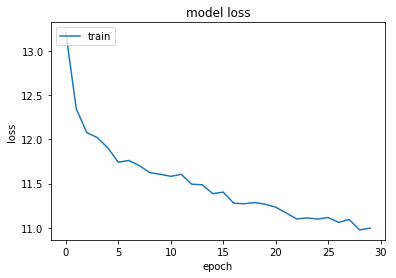

In [48]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

** Few observations **

 - Sometime model reaches local minima and perform worse. Rerunning fix the problem
 - Using more epoch is resulting in overfitting and increase abosulte error